In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

# Импортируем 3 датафрейма на странице семинаров в раззделе Семинар 11

In [2]:
df1 = pd.read_csv("https://raw.githubusercontent.com/iad34/seminars/master/materials/bikes_rent.csv")

In [44]:
df2 = pd.read_csv("https://raw.githubusercontent.com/iad34/seminars/master/materials/data_sem1.csv", \
                  sep=";")

In [14]:
df3 = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data", \
                 na_values="?", header=None).fillna(0)

In [21]:
df1.head(2)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40


### вещественые признаки

In [20]:
from sklearn.preprocessing import PolynomialFeatures

In [28]:
pf = PolynomialFeatures(include_bias=False)
df1_polyn = pf.fit_transform(df1[["atemp", "humidity", "windspeed"]])
df1_polyn

array([[  1.43950000e+01,   8.10000000e+01,   0.00000000e+00, ...,
          6.56100000e+03,   0.00000000e+00,   0.00000000e+00],
       [  1.36350000e+01,   8.00000000e+01,   0.00000000e+00, ...,
          6.40000000e+03,   0.00000000e+00,   0.00000000e+00],
       [  1.36350000e+01,   8.00000000e+01,   0.00000000e+00, ...,
          6.40000000e+03,   0.00000000e+00,   0.00000000e+00],
       ..., 
       [  1.59100000e+01,   6.10000000e+01,   1.50013000e+01, ...,
          3.72100000e+03,   9.15079300e+02,   2.25039002e+02],
       [  1.74250000e+01,   6.10000000e+01,   6.00320000e+00, ...,
          3.72100000e+03,   3.66195200e+02,   3.60384102e+01],
       [  1.66650000e+01,   6.60000000e+01,   8.99810000e+00, ...,
          4.35600000e+03,   5.93874600e+02,   8.09658036e+01]])

In [29]:
df1_polyn.shape

(10886, 9)

In [25]:
df1[["atemp", "humidity", "windspeed"]].shape

(10886, 3)

In [30]:
df1 = df1.drop(["atemp", "humidity", "windspeed"], axis=1)

In [35]:
x = pd.DataFrame(data=df1_polyn, index=df1.index)
df1 = pd.concat([df1, x], axis=1)
df1.head(1)

,datetime,season,holiday,workingday,weather,temp,casual,registered,count,0,...,8,0,1,2,3,4,5,6,7,8
0,2011-01-01 00:00:00,1,0,0,1,9.84,3,13,16,14.395,...,0.0,14.395,81.0,0.0,207.216025,1165.995,0.0,6561.0,0.0,0.0


### нелинейные трансформации признаков

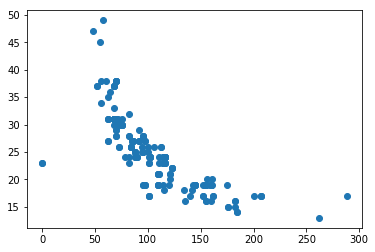

In [36]:
plt.scatter(df3[21], df3[23])

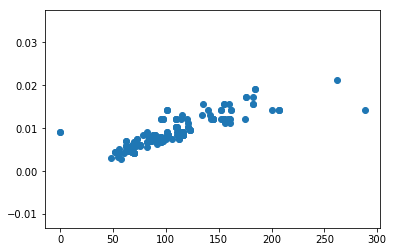

In [40]:
plt.scatter(df3[21], 1/(df3[23])**1.5)

In [ ]:
# np.exp, np.log, **, tanh

In [42]:
df3[24] = 1/(df3[23])**1.5

### binarization

(array([  54.,   46.,  177.,  169.,  118.,   70.,   45.,   24.,    9.,    2.]),
 array([  0.42 ,   8.378,  16.336,  24.294,  32.252,  40.21 ,  48.168,
         56.126,  64.084,  72.042,  80.   ]),
 <a list of 10 Patch objects>)

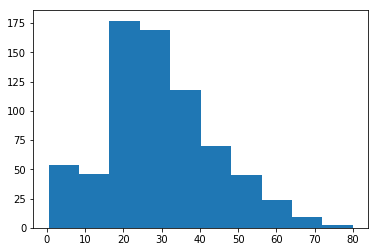

In [45]:
plt.hist(df2["Age"].dropna())

In [46]:
df2["BinAge"] = df2["Age"] < 20

### categorial

In [49]:
pd.get_dummies(df3[[2, 3, 6, 8]]).head()

,2_alfa-romero,2_audi,2_bmw,2_chevrolet,2_dodge,2_honda,2_isuzu,2_jaguar,2_mazda,2_mercedes-benz,...,2_volvo,3_diesel,3_gas,6_convertible,6_hardtop,6_hatchback,6_sedan,6_wagon,8_front,8_rear
0,1,0,0,0,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,1,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,1,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,1,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,1,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,1,0


In [50]:
pd.get_dummies(df3, columns=[2, 3, 6, 8]).head()

,0,1,4,5,7,9,10,11,12,13,...,2_volvo,3_diesel,3_gas,6_convertible,6_hardtop,6_hatchback,6_sedan,6_wagon,8_front,8_rear
0,3,0.0,std,two,rwd,88.6,168.8,64.1,48.8,2548,...,0,0,1,1,0,0,0,0,1,0
1,3,0.0,std,two,rwd,88.6,168.8,64.1,48.8,2548,...,0,0,1,1,0,0,0,0,1,0
2,1,0.0,std,two,rwd,94.5,171.2,65.5,52.4,2823,...,0,0,1,0,0,1,0,0,1,0
3,2,164.0,std,four,fwd,99.8,176.6,66.2,54.3,2337,...,0,0,1,0,0,0,1,0,1,0
4,2,164.0,std,four,4wd,99.4,176.6,66.4,54.3,2824,...,0,0,1,0,0,0,1,0,1,0


In [53]:
df3["New_feat"] = df3[4].astype(str) + "_" + df3[5].astype(str)
df3["New_feat"].head()

0     std_two
1     std_two
2     std_two
3    std_four
4    std_four
Name: New_feat, dtype: object

In [56]:
df1.head(2)

,datetime,season,holiday,workingday,weather,temp,casual,registered,count,0,...,8,0,1,2,3,4,5,6,7,8
0,2011-01-01 00:00:00,1,0,0,1,9.84,3,13,16,14.395,...,0.0,14.395,81.0,0.0,207.216025,1165.995,0.0,6561.0,0.0,0.0
1,2011-01-01 01:00:00,1,0,0,1,9.02,8,32,40,13.635,...,0.0,13.635,80.0,0.0,185.913225,1090.800,0.0,6400.0,0.0,0.0


In [59]:
mapping = df1.groupby("season")["temp"].mean()
mapping

season
1    12.530491
2    22.823483
3    28.789111
4    16.649239
Name: temp, dtype: float64

In [62]:
df1["season_temp"] = df1["season"].map(mapping)

### string

In [64]:
df2.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,BinAge
0,1,0,3,Braund; Mr. Owen Harris,male,22.0,1,0,A/5 21171,7.2500,NaN,S,False
1,2,1,1,Cumings; Mrs. John Bradley (Florence Briggs Th...,female,38.0,1,0,PC 17599,71.2833,C85,C,False


In [67]:
df2["Name"].map(lambda x: 1 if "Mr" in x else -1 if "Mrs" in x else 0).head()

0    1
1    1
2    0
3    1
4    1
Name: Name, dtype: int64

### timestamp

In [72]:
col = pd.to_datetime(df1["datetime"])

In [79]:
col.head(3)

0   2011-01-01 00:00:00
1   2011-01-01 01:00:00
2   2011-01-01 02:00:00
Name: datetime, dtype: datetime64[ns]

In [76]:
col.dt.year.head()

0    2011
1    2011
2    2011
3    2011
4    2011
Name: datetime, dtype: int64

In [77]:
col.dt.month

0         1
1         1
2         1
3         1
4         1
5         1
6         1
7         1
8         1
9         1
10        1
11        1
12        1
13        1
14        1
15        1
16        1
17        1
18        1
19        1
20        1
21        1
22        1
23        1
24        1
25        1
26        1
27        1
28        1
29        1
         ..
10856    12
10857    12
10858    12
10859    12
10860    12
10861    12
10862    12
10863    12
10864    12
10865    12
10866    12
10867    12
10868    12
10869    12
10870    12
10871    12
10872    12
10873    12
10874    12
10875    12
10876    12
10877    12
10878    12
10879    12
10880    12
10881    12
10882    12
10883    12
10884    12
10885    12
Name: datetime, dtype: int64